In [87]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="darkgrid")

In [88]:
# THIS LOADS THE RIGHT DATA IN THE RIGHT SHAPE
simulation_mean_df = pd.read_json('RESULTS_Simple_Model.json')
simulation_mean_df = simulation_mean_df.iloc[1:]
num_rows, num_cols = simulation_mean_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

simulation_mean_df.head()

Number of rows: 19
Number of columns: 100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,85.891658,86.795437,86.795437,78.907317,78.907317,80.322289,80.322289,80.841864,80.841864,79.745972,...,84.319570,94.202812,79.360605,79.360605,80.027304,80.242982,77.911045,77.911045,78.699246,82.710540
2,51.206961,53.153738,53.153738,44.617443,44.617443,48.852043,48.852043,45.077576,45.077576,47.629043,...,47.782685,52.963342,46.055475,46.055475,48.250780,52.449276,49.717501,49.717501,48.055903,45.323319
3,33.696423,36.118101,36.118101,34.052537,34.052537,31.640155,31.640155,32.183951,32.183951,30.754509,...,30.458675,36.035267,30.866940,30.866940,30.664960,34.203370,29.392654,29.392654,31.048663,30.284901
4,23.926649,23.502038,23.502038,23.139810,23.139810,21.008788,21.008788,19.967991,24.337647,24.337647,...,20.965671,27.886101,19.628261,19.628261,22.060387,23.509444,22.059193,22.059193,17.907226,23.256972
5,16.575281,16.321698,16.321698,14.490158,14.490158,14.426483,14.426483,13.813522,14.415550,14.415550,...,15.146356,16.804087,12.356304,15.663650,15.663650,16.840246,15.370953,15.370953,15.144301,14.912980


In [89]:
# The following plot shows the waiting times for all the festival goers for each number of servers in the system

df_melted = pd.melt(simulation_mean_df, value_name="Average Waiting Time", ignore_index=False)
# sns.scatterplot(data=df_melted, x=df_melted.index, y="Waiting Time")
 # this switches the x-axis labels to strat from 1 instead of 0

print(df_melted)

print(df_melted.index)



    variable  Average Waiting Time
1          0             85.891658
2          0             51.206961
3          0             33.696423
4          0             23.926649
5          0             16.575281
..       ...                   ...
15        99              1.971344
16        99              1.972513
17        99              1.972513
18        99              1.972513
19        99              1.972513

[1900 rows x 2 columns]
Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
      dtype='int64', length=1900)


In [90]:
simulation_mean_df.index = simulation_mean_df.index + 1
# to switch the start on the axis to 1 instead of zero, only run ONCE

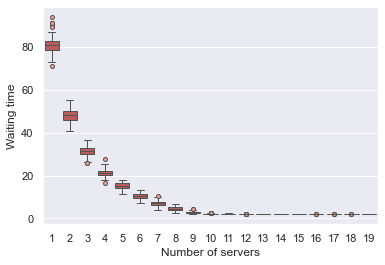

In [97]:
ax = sns.boxplot(data=df_melted, x=df_melted.index, y="Average Waiting Time", color="#c94c4c",  flierprops=dict( marker='o', markersize=4, markerfacecolor="#eea29a"))


#xticks_interval = 4
#labels = ax.get_xticks()[::xticks_interval] 
#ax.set_xticks(labels)

#plt.title("Multi-server Normal Distribution Model: distribution of the waiting times for festival goers per number of servers")
#plt.title("Distribution of Waiting Times for Festival Goers Generated by the Normal Distribution Model")
plt.xlabel("Number of servers")
plt.ylabel("Waiting time")

plt.show()

<Figure size 720x504 with 0 Axes>

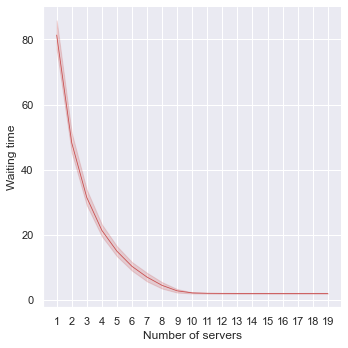

In [99]:
plt.figure(figsize=(10, 7))
sns.relplot(x=df_melted.index, y="Average Waiting Time", 
             data=df_melted, kind="line", errorbar="sd", color="#c94c4c", linewidth=0.8) #color="#034f84") HOW MANY STANDARD DEVIATIONS -> ONE FROM THE MEAN

#plt.title("Multi-server Normal Distribution Model: mean and standard deviation of the waiting times for festival goers")
#plt.title("Distribution of Waiting Times for Festival Goers generated by the Normal Distribution Model")
plt.xlabel("Number of servers")
plt.ylabel("Waiting time")
plt.xticks(np.arange(1, 20, 1))
plt.show()

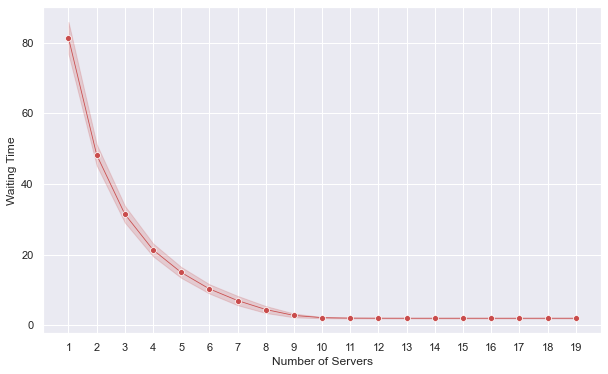

In [101]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_melted.index, y='Average Waiting Time', data=df_melted, marker='o', errorbar="sd", linewidth=0.8, color="#c94c4c")
#plt.title("Waiting Time per Server for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time")
plt.xticks(np.arange(1, 20, 1))
plt.show()

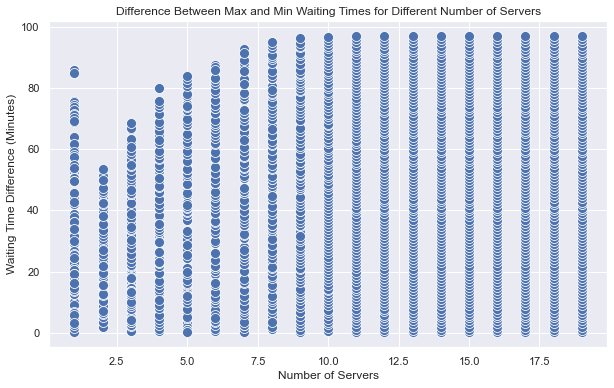

In [94]:
waiting_time_diff = df_melted.max(axis=1) - df_melted.min(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_melted.index, y=waiting_time_diff, s=100)
#sns.scatterplot(x=range(1, len(waiting_time_diff)+1), y=waiting_time_diff, color='skyblue', s=100)
plt.title("Difference Between Max and Min Waiting Times for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time Difference (Minutes)")
#plt.xticks(range(1, len(waiting_time_diff)+1))  # Set x-axis ticks to actual number of servers
plt.show()